# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [7]:
import pandas as pd

In [8]:
# Carregando as bases e os conjuntos de treinamento
X_train = pd.read_csv('./output/X_train_processed.csv', index_col=0) # Considerando que a primeira coluna é o índice
y_train = pd.read_csv('./input/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['activity'])

# Carregando os conjuntos de teste
X_test = pd.read_csv('./output/X_test_processed.csv', index_col=0)  # Considerando que a primeira coluna é o índice
y_test = pd.read_csv('./input/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['activity'])

# Verificando as primeiras linhas para garantir que tudo foi carregado corretamente
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        1           0.288585          -0.020294          -0.132905
1        1           0.278419          -0.016411          -0.123520
2        1           0.279653          -0.019467          -0.113462
3        1           0.279174          -0.026201          -0.123283
4        1           0.276629          -0.016570          -0.115362
   activity
0         5
1         5
2         5
3         5
4         5
   subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
0        2           0.257178          -0.023285          -0.014654
1        2           0.286027          -0.013163          -0.119083
2        2           0.275485          -0.026050          -0.118152
3        2           0.270298          -0.032614          -0.117520
4        2           0.274833          -0.027848          -0.129527
   activity
0         5
1         5
2         5
3         5
4         5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [9]:
from sklearn.model_selection import train_test_split

# Dividindo a base de treino em treino e validação
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificando as primeiras linhas para garantir que tudo foi dividido corretamente
print("Treino:")
print(X_train_final.head())
print(y_train_final.head())

print("\nValidação:")
print(X_val.head())
print(y_val.head())

Treino:
      subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
6593       28           0.217295          -0.028434          -0.035783
3519       17           0.294986          -0.009296          -0.131391
4376       22           0.277687          -0.021567          -0.119773
4294       21           0.284126          -0.016949          -0.110375
29          1           0.279998          -0.019484          -0.105724
      activity
6593         3
3519         6
4376         5
4294         6
29           4

Validação:
      subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
4525       22           0.283203          -0.047024          -0.168986
1446        7           0.256904          -0.036623          -0.133856
5995       27           0.291316          -0.001065          -0.072461
4222       21           0.276116          -0.010909          -0.102886
6754       29           0.256382           0.000428          -0.113664
      activity
4525         3
1446    

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Criando e treinando o modelo de árvore de decisão
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_final, y_train_final)

# Obtendo a importância das variáveis
feature_importances = clf.feature_importances_

# Vinculando a importância às respectivas variáveis
features = list(X_train_final.columns)
importance_mapping = dict(zip(features, feature_importances))

# Ordenando as variáveis pela importância
sorted_features = sorted(importance_mapping, key=importance_mapping.get, reverse=True)

# Selecionando as 3 variáveis mais importantes
top_3_features = sorted_features[:3]

print("As 3 variáveis mais importantes são:")
for feature in top_3_features:
    print(f"{feature}: {importance_mapping[feature]:.4f}")

As 3 variáveis mais importantes são:
tBodyAcc-mean()-X: 0.7077
tBodyAcc-mean()-Y: 0.2225
tBodyAcc-mean()-Z: 0.0649


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [11]:
# Selecionando as 3 variáveis mais importantes
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

In [12]:
from sklearn.metrics import accuracy_score

# Determinando uma faixa de ccp_alpha para testar
ccp_alphas = np.linspace(0, 0.05, 50)  # 50 valores entre 0 e 0.05, ajuste conforme necessário

accuracies = []

# Treinando árvores para cada ccp_alpha e armazenando a acurácia na base de validação
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    tree.fit(X_train_selected, y_train)
    y_val_pred = tree.predict(X_val_selected)
    acc = accuracy_score(y_val, y_val_pred)
    accuracies.append(acc)

# Identificando o ccp_alpha que deu a maior acurácia
best_ccp_alpha = ccp_alphas[np.argmax(accuracies)]
print(f"Melhor ccp_alpha: {best_ccp_alpha}")

Melhor ccp_alpha: 0.0


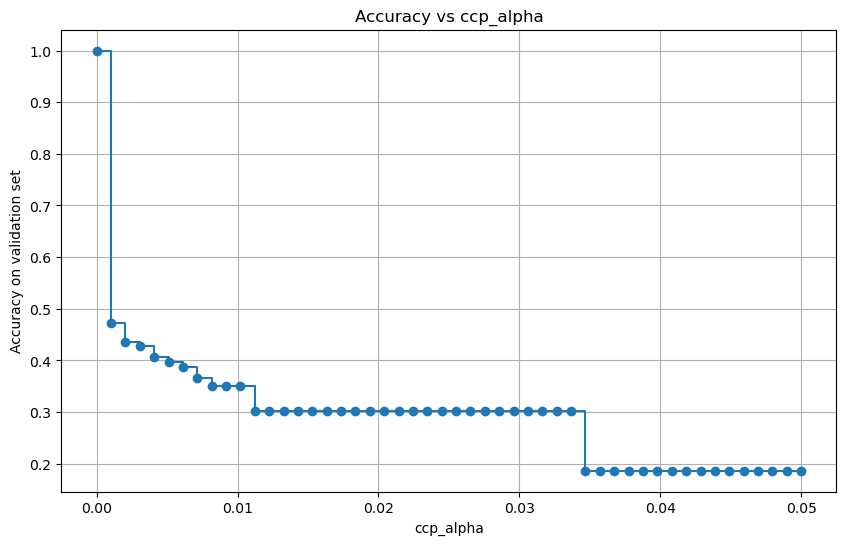

In [13]:
# Plotando a acurácia em função do ccp_alpha
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, accuracies, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy on validation set")
plt.title("Accuracy vs ccp_alpha")
plt.grid(True)
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

O gráfico sugere que:

**Overfitting em ccp_alpha baixo:** No início, com ccp_alpha próximo a 0, o modelo tem desempenho perfeito, indicando um ajuste perfeito aos dados de treino, o que é um sinal de overfitting.

**Degradação e estabilização:** A medida que ccp_alpha aumenta, o desempenho cai drasticamente e depois se estabiliza em torno de 0.3. Isso sugere que o modelo está se tornando mais generalizado, mas após um certo ponto, a poda adicional não traz benefícios significativos.

**Degradação contínua:** Após ccp_alpha = 0.03, o desempenho cai novamente, indicando que excesso de poda está prejudicando o modelo.